In [1]:
import pandas as pd
import numpy as np

# Visualization
import plotly.express as px
import plotly.graph_objs as go

#Cohortes
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter

In [2]:
data = pd.read_csv("db_customers.csv")
data

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


## EDA

### Analyse et Nettoyage

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     105383 non-null  int64  
 1   order_id                       105383 non-null  object 
 2   customer_id                    105383 non-null  object 
 3   order_status                   105383 non-null  object 
 4   order_purchase_timestamp       105383 non-null  object 
 5   order_delivered_customer_date  102224 non-null  object 
 6   payment_type                   105382 non-null  object 
 7   payment_installments           105382 non-null  float64
 8   payment_value                  105382 non-null  float64
 9   review_score                   105383 non-null  int64  
 10  customer_unique_id             105383 non-null  object 
 11  customer_zip_code_prefix       105383 non-null  int64  
 12  customer_city                 

In [4]:
# On constate qu'il y a des manquants dans 5 colonnes. Le dataset dispose de 15 colonnes, 105 383 lignes.
# Il y a 3 colonnes int64, 2 colonnes float64, 10 colonnes object

In [5]:
data.describe()

,Unnamed: 0,payment_installments,payment_value,review_score,customer_zip_code_prefix
count,105383.000000,105382.000000,105382.000000,105383.000000,105383.000000
mean,52691.000000,2.866571,154.617262,4.059848,35075.237961
std,30421.596046,2.700955,217.261585,1.367602,29759.375548
min,0.000000,0.000000,0.000000,1.000000,1003.000000
25%,26345.500000,1.000000,56.930000,4.000000,11349.000000
50%,52691.000000,1.000000,100.120000,5.000000,24360.000000
75%,79036.500000,4.000000,172.847500,5.000000,58423.000000
max,105382.000000,24.000000,13664.080000,5.000000,99990.000000


In [6]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
105378    False
105379    False
105380    False
105381    False
105382    False
Length: 105383, dtype: bool

In [7]:
data.drop_duplicates()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


In [8]:
data.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name_english'],
      dtype='object')

### Visulisation des 'customers unique' & 'order_status'

In [9]:
data[data.duplicated(subset=['customer_unique_id'])]

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
12,12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-16 17:14:30,credit_card,1.0,8.34,5,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,office_furniture
23,23,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,voucher,1.0,24.86,4,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,telephony
24,24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-11-08 22:22:00,credit_card,1.0,5.96,4,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,telephony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105287,105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN
105359,105359,1b4a0e6b19d0034b531655b41ea89623,ce5efd1b1d8a2fa290a871edd5c26cd6,delivered,2017-10-02 08:45:35,2017-10-06 16:58:25,credit_card,4.0,49.75,4,39fff7cb5873a7116b02234bd1e6c6dc,11320,sao vicente,SP,health_beauty
105367,105367,19dba6d1e58b04e7fc820558a38ea398,cf97e9cf454480b303de6736ddd15fd6,delivered,2018-05-12 13:42:24,2018-05-18 17:18:29,credit_card,1.0,104.79,5,9e4accf95024aa6565ca1efcadb96752,8550,poa,SP,watches_gifts
105374,105374,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-20 20:25:45,voucher,1.0,64.37,5,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,toys


In [10]:
data['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [45]:
couleur=['#95a398']

proportions = data['order_status'].value_counts(normalize=True).reset_index()
proportions.columns = ['order_status', 'proportion']

fig = px.bar(proportions, x='order_status', y='proportion',
             title='Proportion des valeurs uniques dans order_status', color_discrete_sequence=couleur)

fig.show()

In [12]:
data['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

In [13]:
data[data['customer_unique_id'] == 'e90598185d2427a35e32ef241a5c04aa']

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
105219,105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN


### Traitement des canceled & unavailable

In [14]:
data_canceled = data[(data['order_status'] == 'canceled') | (data['order_status'] == 'unavailable')]
data_canceled

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
284,284,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,NaN,credit_card,5.0,84.00,1,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,NaN
426,426,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,NaN,boleto,1.0,33.34,1,8ea097b1824dbd4d17af71b0afe04301,5514,sao paulo,SP,computers_accessories
624,624,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,NaN,credit_card,1.0,97.68,3,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,NaN
655,655,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,NaN,credit_card,4.0,96.01,1,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP,furniture_decor
656,656,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,NaN,credit_card,4.0,96.01,1,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105188,105188,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,NaN,boleto,1.0,210.09,1,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN
105219,105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN
105287,105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,NaN
105288,105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,NaN,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN


In [15]:
data_canceled['order_delivered_customer_date'] = data_canceled['order_delivered_customer_date'].fillna('0000-00-00 00:00:00')

data_canceled['product_category_name_english'] = data_canceled['product_category_name_english'].fillna('not defined')

data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'], errors='coerce')

data_canceled

/tmp/ipykernel_20850/3716870382.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20850/3716870382.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
284,284,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,0000-00-00 00:00:00,credit_card,5.0,84.00,1,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,not defined
426,426,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,0000-00-00 00:00:00,boleto,1.0,33.34,1,8ea097b1824dbd4d17af71b0afe04301,5514,sao paulo,SP,computers_accessories
624,624,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,0000-00-00 00:00:00,credit_card,1.0,97.68,3,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,not defined
655,655,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,0000-00-00 00:00:00,credit_card,4.0,96.01,1,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP,furniture_decor
656,656,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,0000-00-00 00:00:00,credit_card,4.0,96.01,1,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105188,105188,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,0000-00-00 00:00:00,boleto,1.0,210.09,1,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,not defined
105219,105219,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,0000-00-00 00:00:00,voucher,1.0,63.89,5,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,not defined
105287,105287,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,0000-00-00 00:00:00,voucher,1.0,107.13,4,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,not defined
105288,105288,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,0000-00-00 00:00:00,credit_card,2.0,195.91,1,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,not defined


### Suppression des lignes avec invoiced, processing, created, approved, canceled, unavailable

In [16]:
values_to_remove = ['invoiced', 'processing', 'created', 'approved', 'canceled', 'unavailable']

data_filtre = data[~data['order_status'].isin(values_to_remove)]
data_filtre = data_filtre[data_filtre['order_id'] != 'bfbd0f9bdef84302105ad712db648a6c']
data_filtre

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


In [17]:
data_filtre.isna().sum() / len(data_filtre) * 100

Unnamed: 0                       0.000000
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_delivered_customer_date    1.148892
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_score                     0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
product_category_name_english    1.488337
dtype: float64

In [18]:
data_filtre = data_filtre.dropna()
data_filtre

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


### Une ligne par client

#### delivered / 

In [19]:
# Convertir les colonnes de dates en format datetime
data_filtre['order_purchase_timestamp'] = pd.to_datetime(data_filtre['order_purchase_timestamp'])
data_filtre['order_delivered_customer_date'] = pd.to_datetime(data_filtre['order_delivered_customer_date'])

data_filtre['payment_installments'] = data_filtre['payment_installments'].astype(str)

# Calculer le délai de livraison
data_filtre['delais_de_livraison'] = data_filtre['order_delivered_customer_date'] - data_filtre['order_purchase_timestamp']

# Agréger par customer_unique_id
aggregated_df = data_filtre.groupby('customer_unique_id').agg({
    'delais_de_livraison': 'first',  
    'payment_value': 'sum',
    'product_category_name_english': lambda x: ', '.join(x.unique()),  
    'review_score': 'first',  
    'payment_installments': lambda x: ', '.join(x.unique()),  
    'payment_type': lambda x: ', '.join(x.unique()),  
    'customer_zip_code_prefix': 'first',
    'customer_city': 'first',
    'customer_state': 'first',
    'order_purchase_timestamp': 'first'  
}).reset_index()

# Calculer la récence
aggregated_df['Recency'] = (pd.to_datetime('now') - aggregated_df['order_purchase_timestamp']).dt.days

# Calculer la fréquence
frequency_df = data_filtre.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_df.columns = ['customer_unique_id', 'Frequency']

# Fusionner la fréquence avec le DataFrame agrégé
aggregated_df = pd.merge(aggregated_df, frequency_df, on='customer_unique_id', how='left')

# Renommer la colonne 'payment_value' en 'Monetary'
aggregated_df.rename(columns={'payment_value': 'Monetary'}, inplace=True)

# Afficher le dataframe agrégé
aggregated_df

/tmp/ipykernel_20850/1601262642.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20850/1601262642.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20850/1601262642.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2

,customer_unique_id,delais_de_livraison,Monetary,product_category_name_english,review_score,payment_installments,payment_type,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,6 days 09:52:10,141.90,bed_bath_table,5,8.0,credit_card,7787,cajamar,SP,2018-05-10 10:56:27,2205,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3 days 06:51:15,27.19,health_beauty,4,1.0,credit_card,6053,osasco,SP,2018-05-07 11:11:27,2208,1
2,0000f46a3911fa3c0805444483337064,25 days 17:33:44,86.22,stationery,3,8.0,credit_card,88115,sao jose,SC,2017-03-10 21:05:03,2630,1
3,0000f6ccb0745a6a4b88665a16c9f078,20 days 00:53:24,43.62,telephony,4,4.0,credit_card,66812,belem,PA,2017-10-12 20:29:41,2414,1
4,0004aac84e0df4da2b147fca70cf8255,13 days 03:23:14,196.89,telephony,5,6.0,credit_card,18040,sorocaba,SP,2017-11-14 19:45:42,2381,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92065,fffcf5a5ff07b0908bd4e2dbc735a684,27 days 12:21:24,2067.42,health_beauty,5,10.0,credit_card,55250,sanharo,PE,2017-06-08 21:00:36,2540,1
92066,fffea47cd6d3cc0a88bd621562a9d061,30 days 02:20:24,84.58,baby,4,1.0,credit_card,44054,feira de santana,BA,2017-12-10 20:07:56,2355,1
92067,ffff371b4d645b6ecea244b27531430a,14 days 20:55:48,112.46,auto,5,1.0,credit_card,78552,sinop,MT,2017-02-07 15:49:16,2662,1
92068,ffff5962728ec6157033ef9805bacc48,11 days 20:36:45,133.69,watches_gifts,5,5.0,credit_card,29460,bom jesus do norte,ES,2018-05-02 15:17:41,2213,1


In [20]:
colonnes = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary',
                         'product_category_name_english', 'payment_type',
                         'payment_installments', 'order_purchase_timestamp',
                         'delais_de_livraison', 'customer_city', 'customer_zip_code_prefix',
                         'customer_state', 'review_score']  # Remplace ces noms par les noms de tes colonnes dans l'ordre désiré
df_reorganise = aggregated_df[colonnes]
df_reorganise

,customer_unique_id,Recency,Frequency,Monetary,product_category_name_english,payment_type,payment_installments,order_purchase_timestamp,delais_de_livraison,customer_city,customer_zip_code_prefix,customer_state,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2205,1,141.90,bed_bath_table,credit_card,8.0,2018-05-10 10:56:27,6 days 09:52:10,cajamar,7787,SP,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2208,1,27.19,health_beauty,credit_card,1.0,2018-05-07 11:11:27,3 days 06:51:15,osasco,6053,SP,4
2,0000f46a3911fa3c0805444483337064,2630,1,86.22,stationery,credit_card,8.0,2017-03-10 21:05:03,25 days 17:33:44,sao jose,88115,SC,3
3,0000f6ccb0745a6a4b88665a16c9f078,2414,1,43.62,telephony,credit_card,4.0,2017-10-12 20:29:41,20 days 00:53:24,belem,66812,PA,4
4,0004aac84e0df4da2b147fca70cf8255,2381,1,196.89,telephony,credit_card,6.0,2017-11-14 19:45:42,13 days 03:23:14,sorocaba,18040,SP,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92065,fffcf5a5ff07b0908bd4e2dbc735a684,2540,1,2067.42,health_beauty,credit_card,10.0,2017-06-08 21:00:36,27 days 12:21:24,sanharo,55250,PE,5
92066,fffea47cd6d3cc0a88bd621562a9d061,2355,1,84.58,baby,credit_card,1.0,2017-12-10 20:07:56,30 days 02:20:24,feira de santana,44054,BA,4
92067,ffff371b4d645b6ecea244b27531430a,2662,1,112.46,auto,credit_card,1.0,2017-02-07 15:49:16,14 days 20:55:48,sinop,78552,MT,5
92068,ffff5962728ec6157033ef9805bacc48,2213,1,133.69,watches_gifts,credit_card,5.0,2018-05-02 15:17:41,11 days 20:36:45,bom jesus do norte,29460,ES,5


In [21]:
nouveau_nom_colonnes = {
    'product_category_name_english': 'product_categ',
    'customer_city': 'city',
    'customer_zip_code_prefix': 'zip_code',
    'customer_state': 'state',
    'order_purchase_timestamp': 'order_purchase',
}

data_propre = df_reorganise.rename(columns=nouveau_nom_colonnes)

data_propre

,customer_unique_id,Recency,Frequency,Monetary,product_categ,payment_type,payment_installments,order_purchase,delais_de_livraison,city,zip_code,state,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2205,1,141.90,bed_bath_table,credit_card,8.0,2018-05-10 10:56:27,6 days 09:52:10,cajamar,7787,SP,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2208,1,27.19,health_beauty,credit_card,1.0,2018-05-07 11:11:27,3 days 06:51:15,osasco,6053,SP,4
2,0000f46a3911fa3c0805444483337064,2630,1,86.22,stationery,credit_card,8.0,2017-03-10 21:05:03,25 days 17:33:44,sao jose,88115,SC,3
3,0000f6ccb0745a6a4b88665a16c9f078,2414,1,43.62,telephony,credit_card,4.0,2017-10-12 20:29:41,20 days 00:53:24,belem,66812,PA,4
4,0004aac84e0df4da2b147fca70cf8255,2381,1,196.89,telephony,credit_card,6.0,2017-11-14 19:45:42,13 days 03:23:14,sorocaba,18040,SP,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92065,fffcf5a5ff07b0908bd4e2dbc735a684,2540,1,2067.42,health_beauty,credit_card,10.0,2017-06-08 21:00:36,27 days 12:21:24,sanharo,55250,PE,5
92066,fffea47cd6d3cc0a88bd621562a9d061,2355,1,84.58,baby,credit_card,1.0,2017-12-10 20:07:56,30 days 02:20:24,feira de santana,44054,BA,4
92067,ffff371b4d645b6ecea244b27531430a,2662,1,112.46,auto,credit_card,1.0,2017-02-07 15:49:16,14 days 20:55:48,sinop,78552,MT,5
92068,ffff5962728ec6157033ef9805bacc48,2213,1,133.69,watches_gifts,credit_card,5.0,2018-05-02 15:17:41,11 days 20:36:45,bom jesus do norte,29460,ES,5


#### canceled

In [22]:
# Convertir les colonnes de dates en format datetime en ignorant les valeurs incorrectes
data_canceled['order_purchase_timestamp'] = pd.to_datetime(data_canceled['order_purchase_timestamp'], errors='coerce')
data_canceled['order_delivered_customer_date'] = pd.to_datetime(data_canceled['order_delivered_customer_date'], errors='coerce')

data_canceled['payment_installments'] = data_canceled['payment_installments'].astype(str)

# Calculer le délai de livraison
data_canceled['delais_de_livraison'] = data_canceled['order_delivered_customer_date'] - data_canceled['order_purchase_timestamp']

# Agréger par customer_unique_id
aggregated_data = data_canceled.groupby('customer_unique_id').agg({
    'delais_de_livraison': 'first',  
    'payment_value': 'sum',
    'product_category_name_english': lambda x: ', '.join(x.unique()),  
    'review_score': 'first',  
    'payment_installments': lambda x: ', '.join(x.unique()),  
    'payment_type': lambda x: ', '.join(x.unique()),  
    'customer_zip_code_prefix': 'first',
    'customer_city': 'first',
    'customer_state': 'first',
    'order_purchase_timestamp': 'first'  
}).reset_index()

# Calculer la récence
aggregated_data['Recency'] = (pd.to_datetime('now') - aggregated_data['order_purchase_timestamp']).dt.days

# Calculer la fréquence
frequency_df = data_canceled.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_df.columns = ['customer_unique_id', 'Frequency']

# Fusionner la fréquence avec le DataFrame agrégé
aggregated_data = pd.merge(aggregated_data, frequency_df, on='customer_unique_id', how='left')

# Renommer la colonne 'payment_value' en 'Monetary'
aggregated_data.rename(columns={'payment_value': 'Monetary'}, inplace=True)

# Afficher le dataframe agrégé
aggregated_data

/tmp/ipykernel_20850/2864900919.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20850/2864900919.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_20850/2864900919.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2

,customer_unique_id,delais_de_livraison,Monetary,product_category_name_english,review_score,payment_installments,payment_type,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,Recency,Frequency
0,00172711b30d52eea8b313a7f2cced02,NaT,122.07,not defined,4,1.0,voucher,45200,jequie,BA,2018-08-13 09:14:07,2110,1
1,004ad212c650c96c8a48f30855a7bcb8,NaT,25.90,not defined,1,1.0,credit_card,39850,ataleia,MG,2017-09-24 10:45:10,2433,1
2,0058f300f57d7b93c477a131a59b36c3,NaT,79.56,stationery,1,1.0,voucher,40731,salvador,BA,2018-02-19 17:11:34,2285,1
3,0071f46a072a9ae25bbe4438b15efe9c,NaT,174.54,not defined,3,4.0,credit_card,16011,aracatuba,SP,2017-02-01 00:04:17,2668,1
4,009b0127b727ab0ba422f6d9604487c7,NaT,40.95,not defined,1,2.0,credit_card,12244,sao jose dos campos,SP,2016-09-13 15:24:19,2809,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,ff28720521c749234b1ba19c9c986f4c,NaT,192.96,not defined,1,7.0,credit_card,1405,sao paulo,SP,2017-02-15 11:25:14,2654,1
1216,ff36be26206fffe1eb37afd54c70e18b,NaT,185.52,not defined,3,1.0,voucher,13057,campinas,SP,2018-08-20 09:03:23,2103,2
1217,ffa0ba4c9a6a0763879efe7c2b8d5b93,NaT,26.12,bed_bath_table,1,1.0,credit_card,5055,sao paulo,SP,2017-02-03 11:31:48,2666,1
1218,ffb5431b49b42c9f3209f087e1bfdcfa,NaT,77.19,not defined,1,1.0,credit_card,20270,rio de janeiro,RJ,2018-02-09 17:34:55,2295,1


In [23]:
colonnes = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary',
                         'product_category_name_english', 'payment_type',
                         'payment_installments', 'order_purchase_timestamp',
                         'delais_de_livraison', 'customer_city', 'customer_zip_code_prefix',
                         'customer_state', 'review_score']  # Remplace ces noms par les noms de tes colonnes dans l'ordre désiré
df_canceled = aggregated_data[colonnes]
df_canceled

,customer_unique_id,Recency,Frequency,Monetary,product_category_name_english,payment_type,payment_installments,order_purchase_timestamp,delais_de_livraison,customer_city,customer_zip_code_prefix,customer_state,review_score
0,00172711b30d52eea8b313a7f2cced02,2110,1,122.07,not defined,voucher,1.0,2018-08-13 09:14:07,NaT,jequie,45200,BA,4
1,004ad212c650c96c8a48f30855a7bcb8,2433,1,25.90,not defined,credit_card,1.0,2017-09-24 10:45:10,NaT,ataleia,39850,MG,1
2,0058f300f57d7b93c477a131a59b36c3,2285,1,79.56,stationery,voucher,1.0,2018-02-19 17:11:34,NaT,salvador,40731,BA,1
3,0071f46a072a9ae25bbe4438b15efe9c,2668,1,174.54,not defined,credit_card,4.0,2017-02-01 00:04:17,NaT,aracatuba,16011,SP,3
4,009b0127b727ab0ba422f6d9604487c7,2809,1,40.95,not defined,credit_card,2.0,2016-09-13 15:24:19,NaT,sao jose dos campos,12244,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,ff28720521c749234b1ba19c9c986f4c,2654,1,192.96,not defined,credit_card,7.0,2017-02-15 11:25:14,NaT,sao paulo,1405,SP,1
1216,ff36be26206fffe1eb37afd54c70e18b,2103,2,185.52,not defined,voucher,1.0,2018-08-20 09:03:23,NaT,campinas,13057,SP,3
1217,ffa0ba4c9a6a0763879efe7c2b8d5b93,2666,1,26.12,bed_bath_table,credit_card,1.0,2017-02-03 11:31:48,NaT,sao paulo,5055,SP,1
1218,ffb5431b49b42c9f3209f087e1bfdcfa,2295,1,77.19,not defined,credit_card,1.0,2018-02-09 17:34:55,NaT,rio de janeiro,20270,RJ,1


In [24]:
nouveau_nom_colonnes = {
    'product_category_name_english': 'product_categ',
    'customer_city': 'city',
    'customer_zip_code_prefix': 'zip_code',
    'customer_state': 'state',
    'order_purchase_timestamp': 'order_purchase',
}

df_canceled = df_canceled.rename(columns=nouveau_nom_colonnes)

df_canceled

,customer_unique_id,Recency,Frequency,Monetary,product_categ,payment_type,payment_installments,order_purchase,delais_de_livraison,city,zip_code,state,review_score
0,00172711b30d52eea8b313a7f2cced02,2110,1,122.07,not defined,voucher,1.0,2018-08-13 09:14:07,NaT,jequie,45200,BA,4
1,004ad212c650c96c8a48f30855a7bcb8,2433,1,25.90,not defined,credit_card,1.0,2017-09-24 10:45:10,NaT,ataleia,39850,MG,1
2,0058f300f57d7b93c477a131a59b36c3,2285,1,79.56,stationery,voucher,1.0,2018-02-19 17:11:34,NaT,salvador,40731,BA,1
3,0071f46a072a9ae25bbe4438b15efe9c,2668,1,174.54,not defined,credit_card,4.0,2017-02-01 00:04:17,NaT,aracatuba,16011,SP,3
4,009b0127b727ab0ba422f6d9604487c7,2809,1,40.95,not defined,credit_card,2.0,2016-09-13 15:24:19,NaT,sao jose dos campos,12244,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,ff28720521c749234b1ba19c9c986f4c,2654,1,192.96,not defined,credit_card,7.0,2017-02-15 11:25:14,NaT,sao paulo,1405,SP,1
1216,ff36be26206fffe1eb37afd54c70e18b,2103,2,185.52,not defined,voucher,1.0,2018-08-20 09:03:23,NaT,campinas,13057,SP,3
1217,ffa0ba4c9a6a0763879efe7c2b8d5b93,2666,1,26.12,bed_bath_table,credit_card,1.0,2017-02-03 11:31:48,NaT,sao paulo,5055,SP,1
1218,ffb5431b49b42c9f3209f087e1bfdcfa,2295,1,77.19,not defined,credit_card,1.0,2018-02-09 17:34:55,NaT,rio de janeiro,20270,RJ,1


## Visualization

In [25]:
ca_total = data_propre['Monetary'].sum()
print("Le chiffre d'affaires total est : {:.2f}".format(ca_total), "€")

Le chiffre d'affaires total est : 15491361.12 €


In [26]:
# On a un chiffre d'affaire total de 15 491 361.12€.

In [27]:
nombre_transactions = len(aggregated_df)

montant_total_transactions = data_propre['Monetary'].sum()

panier_moyen = montant_total_transactions / nombre_transactions

print("Le panier moyen est : {:.2f}".format(panier_moyen), "€")

Le panier moyen est : 168.26 €


In [28]:
# Le panier moyen est de 168.26€

## Analyse RFM

#### delivered

In [29]:
# Calcul des quantiles pour chaque colonne
quantiles = data_propre.quantile(q=[0.2, 0.4, 0.6, 0.8])

# Fonction pour attribuer les scores RFM
def assign_rfm_score(x, column):
    if x <= quantiles[column][0.2]:
        return 5
    elif x <= quantiles[column][0.4]:
        return 4
    elif x <= quantiles[column][0.6]:
        return 3
    elif x <= quantiles[column][0.8]:
        return 2
    else:
        return 1

# Attribution des scores RFM à chaque ligne
data_propre['R_score'] = data_propre['Recency'].apply(assign_rfm_score, args=('Recency',))
data_propre['F_score'] = data_propre['Frequency'].apply(assign_rfm_score, args=('Frequency',))
data_propre['M_score'] = data_propre['Monetary'].apply(assign_rfm_score, args=('Monetary',))

# Calcul du score RFM total
data_propre['RFM_score'] = data_propre['R_score'] + data_propre['F_score'] + data_propre['M_score']
data_propre

,customer_unique_id,Recency,Frequency,Monetary,product_categ,payment_type,payment_installments,order_purchase,delais_de_livraison,city,zip_code,state,review_score,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2205,1,141.90,bed_bath_table,credit_card,8.0,2018-05-10 10:56:27,6 days 09:52:10,cajamar,7787,SP,5,4,5,2,11
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2208,1,27.19,health_beauty,credit_card,1.0,2018-05-07 11:11:27,3 days 06:51:15,osasco,6053,SP,4,4,5,5,14
2,0000f46a3911fa3c0805444483337064,2630,1,86.22,stationery,credit_card,8.0,2017-03-10 21:05:03,25 days 17:33:44,sao jose,88115,SC,3,1,5,4,10
3,0000f6ccb0745a6a4b88665a16c9f078,2414,1,43.62,telephony,credit_card,4.0,2017-10-12 20:29:41,20 days 00:53:24,belem,66812,PA,4,2,5,5,12
4,0004aac84e0df4da2b147fca70cf8255,2381,1,196.89,telephony,credit_card,6.0,2017-11-14 19:45:42,13 days 03:23:14,sorocaba,18040,SP,5,2,5,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92065,fffcf5a5ff07b0908bd4e2dbc735a684,2540,1,2067.42,health_beauty,credit_card,10.0,2017-06-08 21:00:36,27 days 12:21:24,sanharo,55250,PE,5,1,5,1,7
92066,fffea47cd6d3cc0a88bd621562a9d061,2355,1,84.58,baby,credit_card,1.0,2017-12-10 20:07:56,30 days 02:20:24,feira de santana,44054,BA,4,3,5,4,12
92067,ffff371b4d645b6ecea244b27531430a,2662,1,112.46,auto,credit_card,1.0,2017-02-07 15:49:16,14 days 20:55:48,sinop,78552,MT,5,1,5,3,9
92068,ffff5962728ec6157033ef9805bacc48,2213,1,133.69,watches_gifts,credit_card,5.0,2018-05-02 15:17:41,11 days 20:36:45,bom jesus do norte,29460,ES,5,4,5,2,11


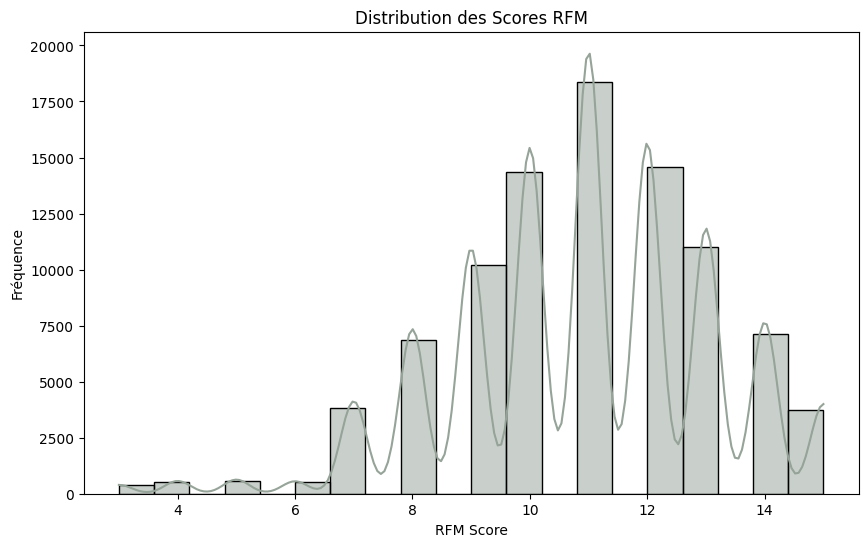

In [83]:
color = '#95a398'

# Tracer l'histogramme avec Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data_propre['RFM_score'], kde=True, bins=20, color=color)
plt.title('Distribution des Scores RFM')
plt.xlabel('RFM Score')
plt.ylabel('Fréquence')
plt.show()

In [50]:
max_rfm_score = data_propre['RFM_score'].max()
print("La valeur maximale de RFM_score est :", max_rfm_score)

La valeur maximale de RFM_score est : 15


In [51]:
min_rfm_score = data_propre['RFM_score'].min()
print("La valeur minimum de RFM_score est :", min_rfm_score)

La valeur minimum de RFM_score est : 3


In [63]:
bins = [2, 6, 10, 15]  # Ajuster les seuils selon tes besoins
labels = ['Faible', 'Moyen', 'Élevé']

data_propre['RFM_segment'] = pd.cut(data_propre['RFM_score'], bins=bins, labels=labels)

# Afficher la répartition des segments
data_propre['RFM_segment'].value_counts()

Élevé     54821
Moyen     35250
Faible     1999
Name: RFM_segment, dtype: int64

In [65]:
fig = px.histogram(data_propre, x='RFM_score', nbins=13, title='Distribution des Scores RFM',
                  color_discrete_sequence=couleur)
fig.update_layout(
    xaxis_title='RFM Score',
    yaxis_title='Fréquence',
)
fig.show()

In [58]:
# Supposons que tu as des colonnes R, F, et M dans ton dataset
rfm_summary = data_propre.groupby('RFM_segment').agg({
    'R_score': 'mean',  # ou 'median' selon ce qui est plus pertinent
    'F_score': 'mean',
    'M_score': 'mean'
}).reset_index()

rfm_summary

,RFM_segment,R_score,F_score,M_score
0,Faible,2.197599,1.000000,1.429215
1,Moyen,2.039035,4.916028,2.040681
2,Élevé,3.655844,4.999781,3.674559


In [67]:
# Visualiser les statistiques par segment
fig = px.bar(rfm_summary, x='RFM_segment', y=['R', 'F', 'M'], barmode='group', title='Statistiques Moyennes par Segment RFM',
            color_discrete_sequence=couleur)
fig.update_layout(
    xaxis_title='Segment RFM',
    yaxis_title='Valeur Moyenne',
)
fig.show()

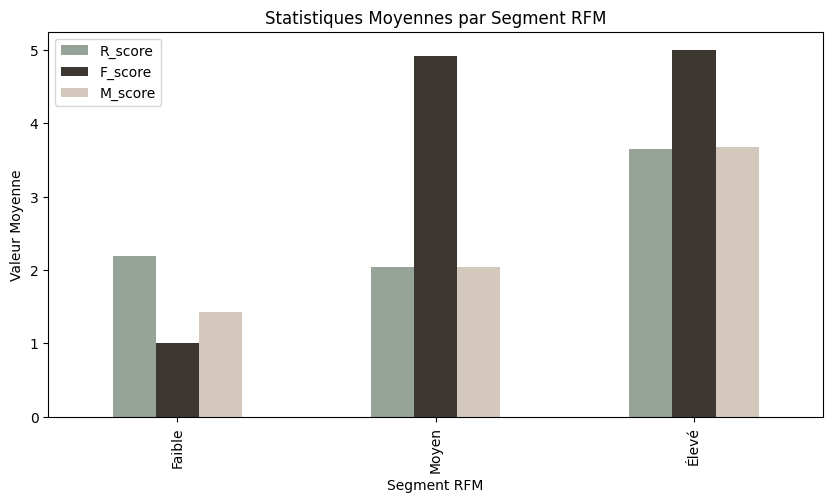

In [84]:
colors = {'Faible': '#95a398', 'Moyen': '#3c3730', 'Élevé': '#d4c8bd'}

# Tracer le graphique à barres avec Matplotlib
rfm_summary.plot(kind='bar', x='RFM_segment', figsize=(10, 5), color=[colors[x] for x in rfm_summary['RFM_segment']])
plt.title('Statistiques Moyennes par Segment RFM')
plt.xlabel('Segment RFM')
plt.ylabel('Valeur Moyenne')
plt.show()

##### Cohort

In [30]:
data_propre.columns

Index(['customer_unique_id', 'Recency', 'Frequency', 'Monetary',
       'product_categ', 'payment_type', 'payment_installments',
       'order_purchase', 'delais_de_livraison', 'city', 'zip_code', 'state',
       'review_score', 'R_score', 'F_score', 'M_score', 'RFM_score'],
      dtype='object')

In [31]:
data_propre['Cohort'] = data_propre['order_purchase'].dt.to_period('M')

# Compter le nombre de clients dans chaque cohorte
cohort_counts = data_propre.groupby('Cohort').size()
cohort_counts

Cohort
2016-10     254
2016-12       1
2017-01     688
2017-02    1561
2017-03    2422
2017-04    2159
2017-05    3327
2017-06    2947
2017-07    3669
2017-08    3955
2017-09    3922
2017-10    4273
2017-11    6956
2017-12    5215
2018-01    6682
2018-02    6197
2018-03    6679
2018-04    6544
2018-05    6532
2018-06    5915
2018-07    5968
2018-08    6204
Freq: M, dtype: int64

In [32]:
# Représente le nombre de commande par mois entre 2016 et 2018

In [85]:
dates = ["2016-10", "2016-12", "2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07", "2017-08",
         "2017-09", "2017-10", "2017-11", "2017-12", "2018-01", "2018-02", "2018-03", "2018-04", "2018-05", "2018-06",
         "2018-07", "2018-08"]
cohort_values = [254, 1, 688, 1561, 2422, 2159, 3327, 2947, 3669, 3955, 3922, 4273, 6956, 5215, 6682, 6197, 6679, 6544,
                 6532, 5915, 5968, 6204]

# Définir les couleurs que tu souhaites utiliser
colors = ['#95a398', '#3c3730', '#d4c8bd']

# Créer la trace de la ligne avec les couleurs spécifiées
trace = go.Scatter(x=dates, y=cohort_values, mode='lines+markers', name='Nombre de commandes', line=dict(color=colors[0]))

# Créer la mise en page du graphique
layout = go.Layout(title='Cohorte de commandes par mois',
                   xaxis=dict(title='Mois'),
                   yaxis=dict(title='Nombre de commandes'))

# Créer la figure
fig = go.Figure(data=[trace], layout=layout)

# Afficher le graphique
fig.show()

In [34]:
# On observe un pic de commande en Novembre 2017 avec 6956 commandes.
# On voit une nette progression des ventes depuis Octobre 2016

In [35]:
data_propre

,customer_unique_id,Recency,Frequency,Monetary,product_categ,payment_type,payment_installments,order_purchase,delais_de_livraison,city,zip_code,state,review_score,R_score,F_score,M_score,RFM_score,Cohort
0,0000366f3b9a7992bf8c76cfdf3221e2,2205,1,141.90,bed_bath_table,credit_card,8.0,2018-05-10 10:56:27,6 days 09:52:10,cajamar,7787,SP,5,4,5,2,11,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2208,1,27.19,health_beauty,credit_card,1.0,2018-05-07 11:11:27,3 days 06:51:15,osasco,6053,SP,4,4,5,5,14,2018-05
2,0000f46a3911fa3c0805444483337064,2630,1,86.22,stationery,credit_card,8.0,2017-03-10 21:05:03,25 days 17:33:44,sao jose,88115,SC,3,1,5,4,10,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2414,1,43.62,telephony,credit_card,4.0,2017-10-12 20:29:41,20 days 00:53:24,belem,66812,PA,4,2,5,5,12,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2381,1,196.89,telephony,credit_card,6.0,2017-11-14 19:45:42,13 days 03:23:14,sorocaba,18040,SP,5,2,5,2,9,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92065,fffcf5a5ff07b0908bd4e2dbc735a684,2540,1,2067.42,health_beauty,credit_card,10.0,2017-06-08 21:00:36,27 days 12:21:24,sanharo,55250,PE,5,1,5,1,7,2017-06
92066,fffea47cd6d3cc0a88bd621562a9d061,2355,1,84.58,baby,credit_card,1.0,2017-12-10 20:07:56,30 days 02:20:24,feira de santana,44054,BA,4,3,5,4,12,2017-12
92067,ffff371b4d645b6ecea244b27531430a,2662,1,112.46,auto,credit_card,1.0,2017-02-07 15:49:16,14 days 20:55:48,sinop,78552,MT,5,1,5,3,9,2017-02
92068,ffff5962728ec6157033ef9805bacc48,2213,1,133.69,watches_gifts,credit_card,5.0,2018-05-02 15:17:41,11 days 20:36:45,bom jesus do norte,29460,ES,5,4,5,2,11,2018-05


In [36]:
# Convertir la colonne 'order_purchase' en datetime
data_propre['order_purchase'] = pd.to_datetime(data_propre['order_purchase'])

In [37]:
# Créer une colonne 'CohortMonth' pour la cohorte basée sur le mois de la première commande
data_propre['CohortMonth'] = data_propre.groupby('customer_unique_id')['order_purchase'].transform('min').dt.to_period('M')

In [38]:
data_propre['OrderMonth'] = data_propre['order_purchase'].dt.to_period('M')
data_propre['CohortIndex'] = (data_propre['OrderMonth'] - data_propre['CohortMonth']).apply(attrgetter('n'))

In [39]:
cohort_data = data_propre.groupby(['CohortMonth', 'CohortIndex'])['customer_unique_id'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customer_unique_id')

# Remplacer les valeurs manquantes par 0
cohort_pivot = cohort_pivot.fillna(0)

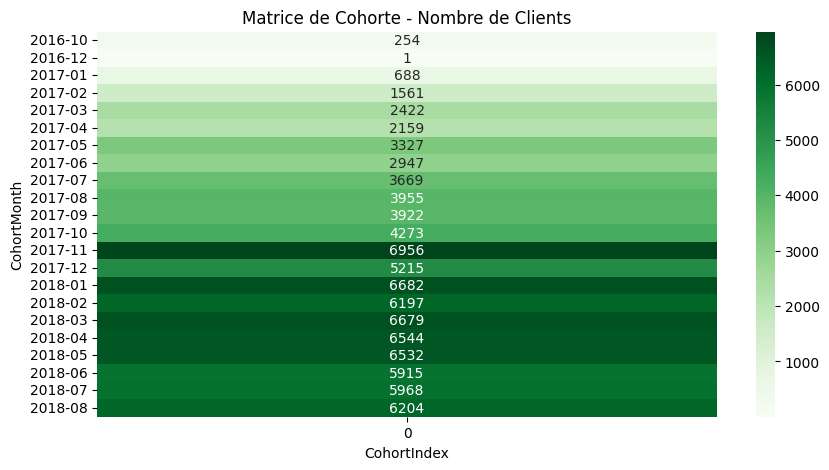

In [89]:
custom_palette = "Greens"

# Tracer la carte de chaleur avec Seaborn en utilisant la couleur personnalisée
plt.figure(figsize=(10, 5))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap=custom_palette)
plt.title('Matrice de Cohorte - Nombre de Clients')
plt.show()

#### canceled

In [41]:
# Calcul des quantiles pour chaque colonne
quantiles = aggregated_data.quantile(q=[0.2, 0.4, 0.6, 0.8])

# Fonction pour attribuer les scores RFM
def assign_rfm_score(x, column):
    if x <= quantiles[column][0.2]:
        return 5
    elif x <= quantiles[column][0.4]:
        return 4
    elif x <= quantiles[column][0.6]:
        return 3
    elif x <= quantiles[column][0.8]:
        return 2
    else:
        return 1

# Attribution des scores RFM à chaque ligne
df_canceled['R_score'] = df_canceled['Recency'].apply(assign_rfm_score, args=('Recency',))
df_canceled['F_score'] = df_canceled['Frequency'].apply(assign_rfm_score, args=('Frequency',))
df_canceled['M_score'] = df_canceled['Monetary'].apply(assign_rfm_score, args=('Monetary',))

# Calcul du score RFM total
df_canceled['RFM_score'] = df_canceled['R_score'] + df_canceled['F_score'] + df_canceled['M_score']
df_canceled

,customer_unique_id,Recency,Frequency,Monetary,product_categ,payment_type,payment_installments,order_purchase,delais_de_livraison,city,zip_code,state,review_score,R_score,F_score,M_score,RFM_score
0,00172711b30d52eea8b313a7f2cced02,2110,1,122.07,not defined,voucher,1.0,2018-08-13 09:14:07,NaT,jequie,45200,BA,4,5,5,3,13
1,004ad212c650c96c8a48f30855a7bcb8,2433,1,25.90,not defined,credit_card,1.0,2017-09-24 10:45:10,NaT,ataleia,39850,MG,1,2,5,5,12
2,0058f300f57d7b93c477a131a59b36c3,2285,1,79.56,stationery,voucher,1.0,2018-02-19 17:11:34,NaT,salvador,40731,BA,1,4,5,4,13
3,0071f46a072a9ae25bbe4438b15efe9c,2668,1,174.54,not defined,credit_card,4.0,2017-02-01 00:04:17,NaT,aracatuba,16011,SP,3,1,5,2,8
4,009b0127b727ab0ba422f6d9604487c7,2809,1,40.95,not defined,credit_card,2.0,2016-09-13 15:24:19,NaT,sao jose dos campos,12244,SP,1,1,5,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,ff28720521c749234b1ba19c9c986f4c,2654,1,192.96,not defined,credit_card,7.0,2017-02-15 11:25:14,NaT,sao paulo,1405,SP,1,1,5,2,8
1216,ff36be26206fffe1eb37afd54c70e18b,2103,2,185.52,not defined,voucher,1.0,2018-08-20 09:03:23,NaT,campinas,13057,SP,3,5,1,2,8
1217,ffa0ba4c9a6a0763879efe7c2b8d5b93,2666,1,26.12,bed_bath_table,credit_card,1.0,2017-02-03 11:31:48,NaT,sao paulo,5055,SP,1,1,5,5,11
1218,ffb5431b49b42c9f3209f087e1bfdcfa,2295,1,77.19,not defined,credit_card,1.0,2018-02-09 17:34:55,NaT,rio de janeiro,20270,RJ,1,4,5,4,13


In [42]:
df_canceled['Cohort'] = df_canceled['order_purchase'].dt.to_period('M')

# Compter le nombre de clients dans chaque cohorte
cohort_counts = df_canceled.groupby('Cohort').size()
cohort_counts

Cohort
2016-09      2
2016-10     31
2017-01     13
2017-02     62
2017-03     65
2017-04     27
2017-05     60
2017-06     40
2017-07     79
2017-08     59
2017-09     58
2017-10     82
2017-11    119
2017-12     53
2018-01     82
2018-02    103
2018-03     43
2018-04     20
2018-05     40
2018-06     22
2018-07     59
2018-08     86
2018-09     11
2018-10      4
Freq: M, dtype: int64

In [43]:
# Données de la cohorte
dates = ["2016-09", "2016-10", "2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07", "2017-08",
         "2017-09", "2017-10", "2017-11", "2017-12", "2018-01", "2018-02", "2018-03", "2018-04", "2018-05", "2018-06",
         "2018-07", "2018-08", "2018-09", "2018-10"]
cohort_values = [2, 31, 13, 62, 65, 27, 60, 40, 79, 59, 58, 82, 119, 53, 82, 103, 43, 20, 40, 22, 59, 86, 11, 4]

# Créer la trace de la ligne
trace = go.Scatter(x=dates, y=cohort_values, mode='lines+markers', name='Nombre de commandes')

# Créer la mise en page du graphique
layout = go.Layout(title='Cohorte de commandes par mois',
                   xaxis=dict(title='Mois'),
                   yaxis=dict(title='Nombre de commandes'))

# Créer la figure
fig = go.Figure(data=[trace], layout=layout)

# Afficher le graphique
fig.show()